In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salaries.csv')
df.head()

,Date,Company,Position,Salary,Years of experience
0,4/15/2019 14:54:09,International IT Company,IT Project Manager,"700,000",NaN
1,4/15/2019 14:54:55,NaN,Team Leader,"2,500,000",NaN
2,4/15/2019 14:55:12,NaN,DevOps,"1,450,000",NaN
3,4/15/2019 14:55:30,NaN,Junior Java Developer,"600,000",NaN
4,4/15/2019 14:56:39,NaN,Senior Software Engineer,"1,100,000",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1012 non-null   object 
 1   Company              658 non-null    object 
 2   Position             1012 non-null   object 
 3   Salary               1012 non-null   object 
 4   Years of experience  955 non-null    float64
dtypes: float64(1), object(4)
memory usage: 39.7+ KB


In [4]:
df.describe()

,Years of experience
count,955.000000
mean,4.009843
std,3.625822
min,0.000000
25%,1.500000
50%,3.000000
75%,5.000000
max,30.000000


In [5]:
df.isna().sum()

Date                     0
Company                354
Position                 0
Salary                   0
Years of experience     57
dtype: int64

In [6]:
df['Position'].count()

1012

In [7]:
df['Position'].nunique()

652

In [8]:
df['Salary'] = df['Salary'].str.replace(',', '').str.replace('.', '').astype(int)

In [36]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [10]:
from transliterate import translit

In [11]:
df['Position'] = df['Position'].apply(lambda x: translit(x, 'hy', reversed=True))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1012 non-null   object 
 1   Company              658 non-null    object 
 2   Position             1012 non-null   object 
 3   Salary               1012 non-null   int32  
 4   Years of experience  955 non-null    float64
dtypes: float64(1), int32(1), object(3)
memory usage: 35.7+ KB


In [13]:
df.head()

,Date,Company,Position,Salary,Years of experience
0,2019-04-15,International IT Company,IT Project Manager,700000,NaN
1,2019-04-15,NaN,Team Leader,2500000,NaN
2,2019-04-15,NaN,DevOps,1450000,NaN
3,2019-04-15,NaN,Junior Java Developer,600000,NaN
4,2019-04-15,NaN,Senior Software Engineer,1100000,NaN


In [14]:
df['Salary'].agg(['mean', 'median', 'min', 'max'])

mean      9.328338e+05
median    5.000000e+05
min       2.200000e+04
max       1.600000e+08
Name: Salary, dtype: float64

In [15]:
df = df[df['Salary'] < 1500000]

In [16]:
median_experience = df['Years of experience'].median()
df['Years of experience'].fillna(median_experience, inplace=True)

In [17]:
import re

df.loc[df['Position'].str.contains(re.compile(r'senior', re.IGNORECASE)), 'Position Type'] = 'Senior'
df.loc[df['Position'].str.contains(re.compile(r'middle', re.IGNORECASE)), 'Position Type'] = 'Middle'
df.loc[df['Position'].str.contains(re.compile(r'junior', re.IGNORECASE)), 'Position Type'] = 'Junior'

In [18]:
def classify_experience(experience):
    if experience < 2:
        return 'Junior'
    elif experience < 4.5:
        return 'Middle'
    elif experience >= 4.5:
        return 'Senior'
    else:
        return experience

# Apply the function to create a new column
df['classified_experience'] = df['Years of experience'].apply(classify_experience)

In [19]:
df.head()

,Date,Company,Position,Salary,Years of experience,Position Type,classified_experience
0,2019-04-15,International IT Company,IT Project Manager,700000,2.5,NaN,Middle
2,2019-04-15,NaN,DevOps,1450000,2.5,NaN,Middle
3,2019-04-15,NaN,Junior Java Developer,600000,2.5,Junior,Middle
4,2019-04-15,NaN,Senior Software Engineer,1100000,2.5,Senior,Middle
5,2019-04-15,NaN,Senior Software Engineer,1300000,2.5,Senior,Middle


In [20]:
def extract_keyword(position):
    # Define patterns to match
    patterns = ['software engineer', 'human resouce', 'HR', 'engineer', 'analyst', 'web', 'Customer support', 'manager', 'QA', 'scientist', 'devops', 'developer', 'Designer', 'programmer', 'SEO', 'Owner', 'administrator']

    # Iterate through patterns and return the first match
    for pattern in patterns:
        if re.search(pattern, position, re.IGNORECASE):
            return pattern

    return 'Other'  # Return 'Other' if no match is found

# Apply the function to the Position column
df['MainKeyword'] = df['Position'].apply(extract_keyword)

In [21]:
df.head()

,Date,Company,Position,Salary,Years of experience,Position Type,classified_experience,MainKeyword
0,2019-04-15,International IT Company,IT Project Manager,700000,2.5,NaN,Middle,manager
2,2019-04-15,NaN,DevOps,1450000,2.5,NaN,Middle,devops
3,2019-04-15,NaN,Junior Java Developer,600000,2.5,Junior,Middle,developer
4,2019-04-15,NaN,Senior Software Engineer,1100000,2.5,Senior,Middle,software engineer
5,2019-04-15,NaN,Senior Software Engineer,1300000,2.5,Senior,Middle,software engineer


In [22]:
df.groupby('classified_experience')['Salary'].agg(['mean', 'median', 'count', 'min', 'max'])

,mean,median,count,min,max
classified_experience,,,,,
Junior,250346.562992,207000.0,254,22000,1200000
Middle,552492.217391,500000.0,414,50000,1450000
Senior,812262.327189,820000.0,217,46000,1450000


In [23]:
grouped_stats = df.groupby('MainKeyword')['Salary'].agg(['mean', 'median', 'count'])
grouped_stats

,mean,median,count
MainKeyword,,,
Customer support,250000.000000,300000.0,3
Designer,549725.000000,475000.0,40
HR,551744.642857,425000.0,14
Other,421200.348837,315000.0,172
Owner,717500.000000,750000.0,16
QA,385899.326531,250000.0,49
SEO,262500.000000,262500.0,2
administrator,551666.666667,580000.0,15
analyst,615400.000000,800000.0,15


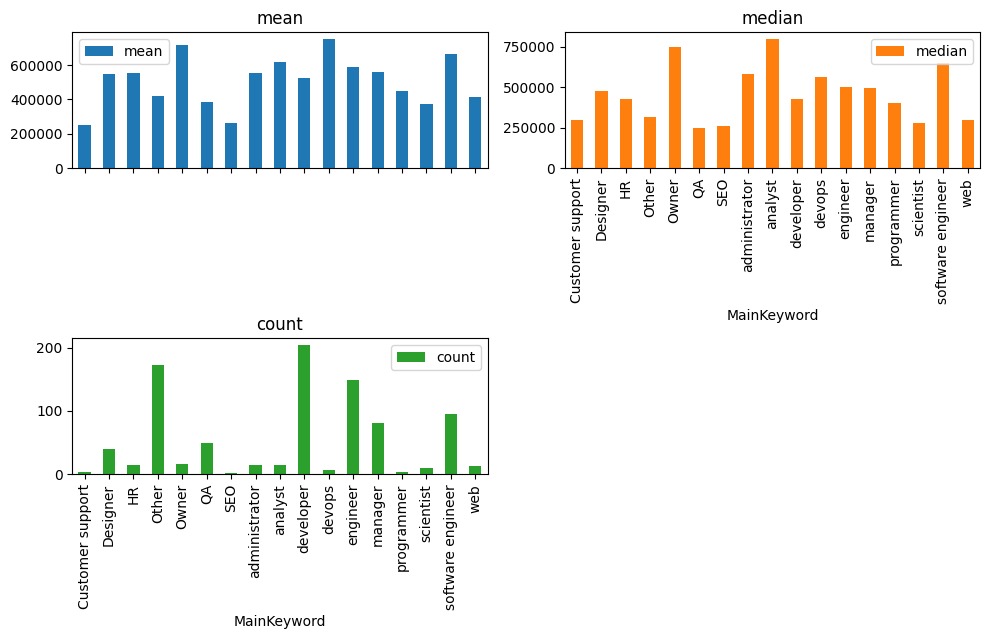

In [24]:
grouped_stats.plot(kind='bar', subplots=True, layout=(3, 2), figsize=(10, 8), legend=True)
plt.tight_layout()
plt.show()

In [68]:
developer_stats =df[df['MainKeyword'] == 'developer'].groupby('Company')['Salary'].agg(['mean', 'median', 'count'])
developer_stats

,mean,median,count
Company,,,
A software development office,350000.0,350000.0,1
AEB,540000.0,540000.0,1
AOD.space,250000.0,250000.0,1
Armenian Startup,1400000.0,1400000.0,1
Armenian startup,1400000.0,1400000.0,1
...,...,...,...
Zangi,55000.0,55000.0,1
betconstruct,250000.0,250000.0,2
inDataSide,75000.0,75000.0,1


In [94]:
developer_stats_filtered = developer_stats[developer_stats['count'] > 1]
developer_stats_filtered

,mean,median,count
Company,,,
Armsoft,1.450000e+05,145000.0,2
Ayotech,3.100000e+05,310000.0,2
BetConstruct,9.250000e+05,925000.0,2
Betconstruct,4.150000e+05,415000.0,2
DataArt,9.714286e+05,900000.0,7
EGS,7.666667e+05,600000.0,3
EPAM,1.000000e+06,1000000.0,2
Energize Global Services,4.813333e+05,500000.0,3
Epam,7.250000e+05,725000.0,2


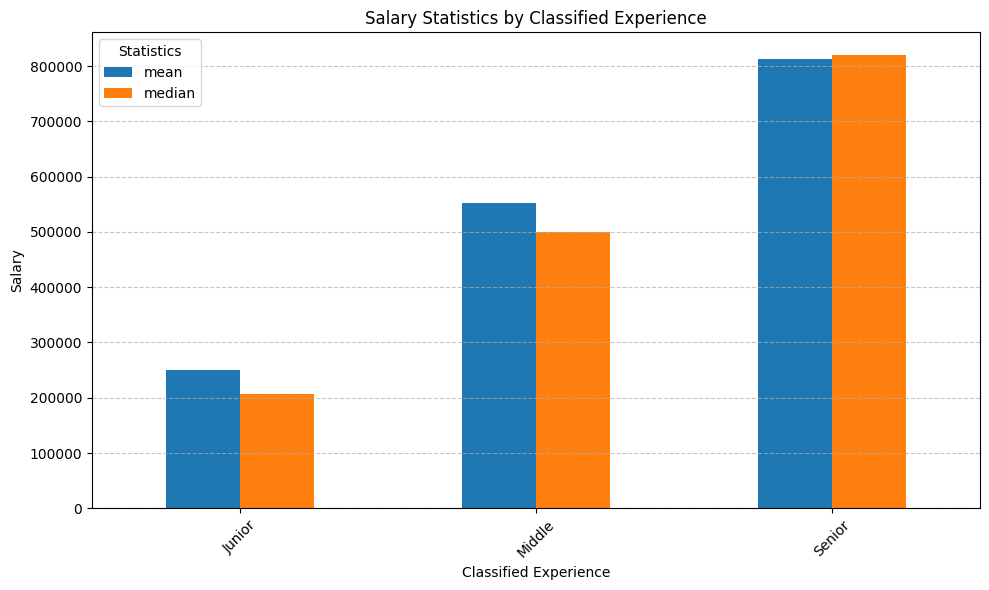

In [28]:
experience_stats = df.groupby('classified_experience')['Salary'].agg(['mean', 'median'])


experience_stats = df.groupby('classified_experience')['Salary'].agg(['mean', 'median'])

# Plotting
experience_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Salary Statistics by Classified Experience')
plt.xlabel('Classified Experience')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Statistics')
plt.tight_layout()
plt.show()

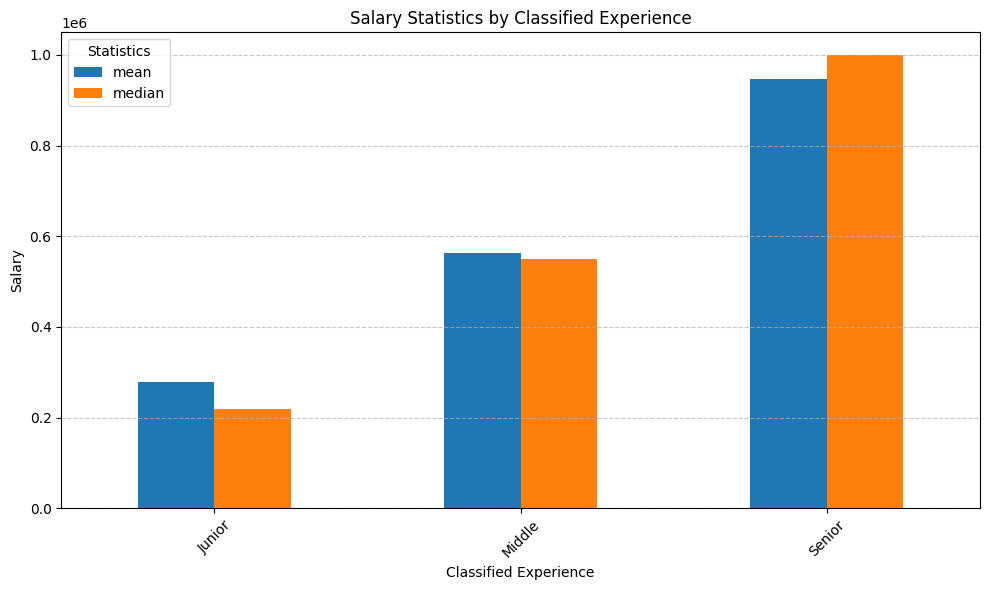

In [29]:
experience_stats = df.groupby('Position Type')['Salary'].agg(['mean', 'median'])


# Plotting
experience_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Salary Statistics by Classified Experience')
plt.xlabel('Classified Experience')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Statistics')
plt.tight_layout()
plt.show()

In [25]:
bins = [0, 2, 4.5, float('inf')]  # Up to 2, 2 to 5, more than 5
labels = ['Up to 2 years', '2 to 4.5 years', 'More than 4.5 years']

# Create a new column 'Experience Group' based on the defined bins
df['Experience Group'] = pd.cut(df['Years of experience'], bins=bins, labels=labels, right=False)

# Group by 'Experience Group' and aggregate statistics
experience_stats = df.groupby('Experience Group')['Salary'].agg(['mean', 'median', 'count'])

print(experience_stats)

                              mean    median  count
Experience Group                                   
Up to 2 years        250346.562992  207000.0    254
2 to 4.5 years       552492.217391  500000.0    414
More than 4.5 years  812262.327189  820000.0    217


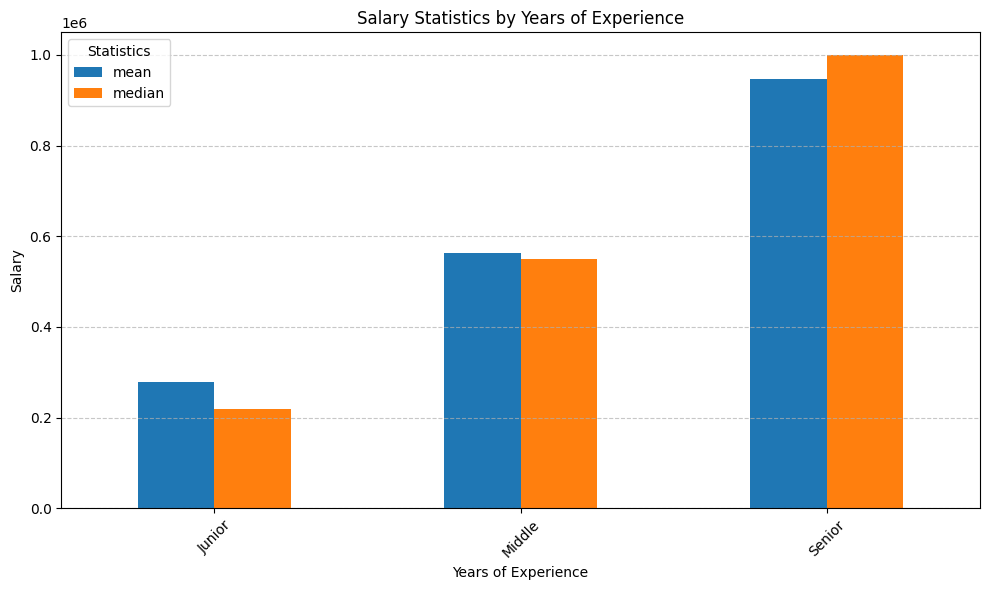

In [30]:
experience_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Salary Statistics by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Statistics')
plt.tight_layout()
plt.show()

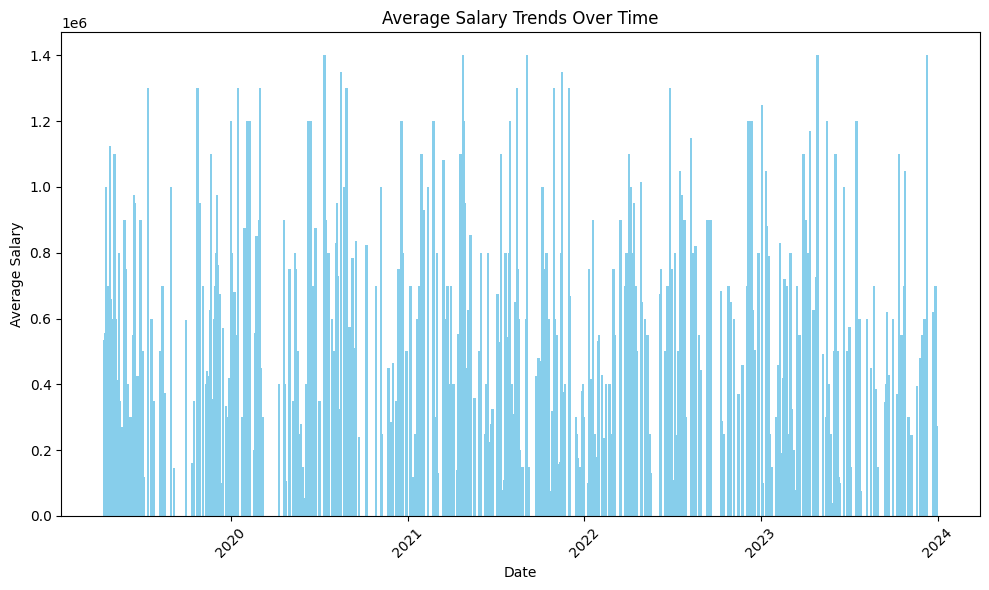

In [31]:
salary_by_date = df.groupby('Date')['Salary'].median()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(salary_by_date.index, salary_by_date.values, color='skyblue', width=5)
plt.title('Average Salary Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

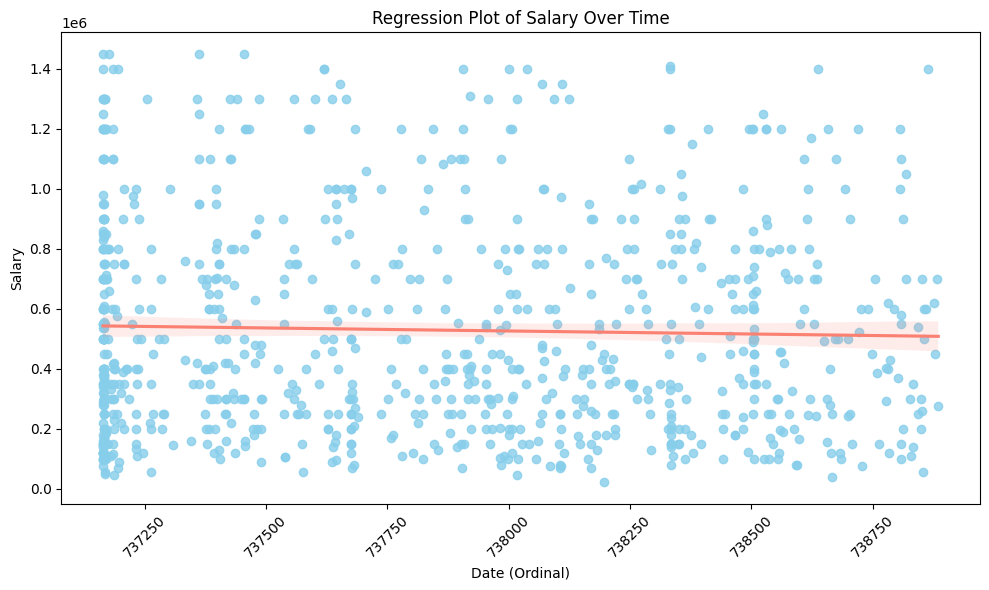

In [32]:
df['Date_Ordinal'] = df['Date'].apply(lambda x: x.toordinal())
plt.figure(figsize=(10, 6))
sns.regplot(x='Date_Ordinal', y='Salary', data=df, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'salmon'})
plt.title('Regression Plot of Salary Over Time')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(df, x = 'Years of experience', y='Salary')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885 entries, 0 to 1010
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   885 non-null    object  
 1   Company                564 non-null    object  
 2   Position               885 non-null    object  
 3   Salary                 885 non-null    int32   
 4   Years of experience    885 non-null    float64 
 5   Position Type          183 non-null    object  
 6   classified_experience  885 non-null    object  
 7   MainKeyword            885 non-null    object  
 8   Experience Group       885 non-null    category
 9   Date_Ordinal           885 non-null    int64   
dtypes: category(1), float64(1), int32(1), int64(1), object(6)
memory usage: 66.7+ KB


In [38]:
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')

# Now you can filter the DataFrame for dates in the year 2019 and 2023
A_test = df[df['Date'].dt.year == 2019]

In [39]:

B_test = df[df['Date'].dt.year == 2023]

In [52]:
import scipy.stats as stats
# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(A_test['Salary'], B_test['Salary'], equal_var=False)

# Check the p-value against the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in salaries between 2019 and 2023 years.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in salaries between 2023 and 2019 years.")
    

    print('p value: ', p_value)
    print('t stat: ', t_statistic)

Fail to reject the null hypothesis. There is no significant difference in salaries between 2023 and 2019 years.
p value:  0.568600401126014
t stat:  0.5710116308431594


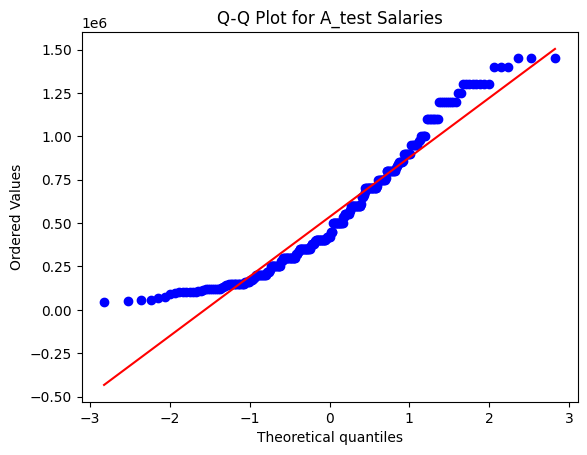

Shapiro-Wilk test for A_test salaries:
Statistic: 0.9268006086349487 p-value: 8.204941587264258e-11
Shapiro-Wilk test for B_test salaries:
Statistic: 0.9214239716529846 p-value: 4.095165422768332e-06

Levene's test for equality of variance:
Statistic: 0.008942177156930865 p-value: 0.9247084086972571


In [51]:
stats.probplot(A_test['Salary'], dist="norm", plot=plt)
plt.title("Q-Q Plot for A_test Salaries")
plt.show()

# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(A_test['Salary'])
print("Shapiro-Wilk test for A_test salaries:")
print("Statistic:", statistic, "p-value:", p_value)


statistic, p_value = stats.shapiro(B_test['Salary'])
print("Shapiro-Wilk test for B_test salaries:")
print("Statistic:", statistic, "p-value:", p_value)
# Repeat the above steps for B_test salaries

# Assumption 3: Check for equal variance using Levene's test
statistic, p_value = stats.levene(A_test['Salary'], B_test['Salary'])
print("\nLevene's test for equality of variance:")
print("Statistic:", statistic, "p-value:", p_value)

